|[![author](https://img.shields.io/badge/author-ghermsen-red.svg)](https://www.linkedin.com/in/gabrielhermsen/)|[![](https://img.shields.io/badge/python-3.9-blue.svg)](https://docs.python.org/3.9/)|[![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html)|[![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/ghermsen/airbnb_munchen/issues)
|-|-|-|-

# Data Analysis from Airbnb - Munich

The IPO (Initial Public Offering, that is, the process in which a private company goes public by selling its shares to the general public) of [Airbnb](https://www.airbnb.com) took place on December 9, 2020, and its shares started trading on December 10, 2020. On that day, the company's shares were worth USD144.71, an incredible 112.00% more than the USD68.00 value set by the company in its IPO, making the company reach the mark of USD100 Billion in market value, surpassing giants from hotel industries like Marriott International, Hilton, and Hyatt.

The Startup, founded in 2008, offers an attractive and easy-to-use platform for its users, connecting travelers or people who want to stay in a property and hosts (people who prefer to rent their property for a short time). Airbnb is present in more than 80,000 cities worldwide and has hosted more than 300 million people, and it is considered by many to be the largest hotel company today, and the main detail is: Airbnb does not have any hotels!

One of Airbnb's initiatives is to provide website data for some of the world's major cities. Through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html), it is possible to download a large amount of data to develop Data Science projects and solutions.

**In this project, we will analyze the data for the city of Munich and see which insights can be extracted from raw data.**


<br><center><img alt="Airbnb München" width="100%" src="https://www.sueddeutsche.de/image/sz.1.4251859/1840x772?v=1544705249&format=webp"></center>
<div align="center"><em>Image Source: <a href:"https://www.sueddeutsche.de/muenchen/airbnb-kommentar-1.4251629"> Süddeutsche Zeitung</a><em></div>

---

## Imports

Below there are all the libraries used in this project.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geopy import Nominatim
from functools import reduce

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [18, 11]

/home/gabriel/.pyenv/versions/3.9.0/envs/DSNP/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Obtaining the Data

All data used in this project was obtained from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For this data analysis, the following files will be downloaded:

* Exploratory Data Analysis
    * City - Munich, Bavaria, Germany
    * Data Compiled - 24 December, 2020
    * File - `listings.csv` - *Summary information and metrics for listings in Munich (good for visualisations)*.
    
    
* Map visualization
    * City - Munich, Bavaria, Germany
    * Data Compiled - N/A
    * File - `neighbourhoods.geojson` - *GeoJSON file of neighbourhoods of the city.*.

In [2]:
# importing the data

df_raw = pd.read_csv('http://data.insideairbnb.com/germany/bv/munich/2020-12-24/visualisations/listings.csv')

munich_neighbourhoods_airbnb_df = gpd.read_file('http://data.insideairbnb.com/germany/bv/munich/2020-12-24/visualisations/neighbourhoods.geojson')

### Understanding the Dataset

Understanding the data is a fundamental step in any data science project. It will show us the variables available in our dataset and how these variables are structured. This step helps us understand the type of problem and how we will solve it.

**Variables' Dictionary**:

* `id` - property id number
* `name` - property name announced
* `host_id` - host id number
* `host_name` - host name
* `neighbourhood_group` - there are no values and will be deleted
* `neighbourhood` - neighbourhood name
* `latitude` - property latitude
* `longitude` - property longitude
* `room_type` - property type announced
* `price` - daily rate
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - total number of reviews for the property
* `last_review` - date of the last review
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of properties from the same host
* `availability_365` - number of days available in the calendar year
    * **in München there is a rule where entire properties can be rented for only 8 weeks during the calendar year, however, this restriction is not valid for rooms**.

We can now check the first five entries in our dataset to better understand our data.

In [3]:
# checking the first entries

df_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,130,2019-10-03,1.18,2,5
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,2,53,2019-10-06,0.46,2,52
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,99,2,93,2020-10-20,0.80,1,9
3,170815,Your own flat near central station!,814793,Inge,NaN,Neuhausen-Nymphenburg,48.16132,11.54154,Entire home/apt,65,3,64,2020-02-18,0.56,1,0
4,171749,1min to subway - Wettersteinplatz,819382,Tarek,NaN,Untergiesing-Harlaching,48.10583,11.57843,Private room,37,3,357,2020-12-04,3.12,1,85


### Dataset Size and Types of Variables

Below, it is possible to see the size of our dataset and the type of its variables.

In [4]:
# dataset size

print(f'Number of Entries:\t {df_raw.shape[0]}')
print(f'Number of Features:\t {df_raw.shape[1]}')

Number of Entries:	 4815
Number of Features:	 16


In [5]:
# type of variables

df_raw.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Cleaning the Dataset

Looking at the Variables Dictionary and also the types of variables present in the dataset, it is possible to see the presence of variables that will not be used in our analysis, such as:

- `id`
- `host_id`
- `host_name`
- `neighbourhood_group`
- `number_of_reviews`
- `last_review`
- `reviews_per_month`
- `calculated_host_listings_count`

For a cleaner and more objective analysis, these variables will be deleted.

Below, there is a sample of our dataset.

In [6]:
# cleaning the dataset

df_raw.drop('id', axis = 1, inplace = True)
df_raw.drop('host_id', axis = 1, inplace = True)
df_raw.drop('host_name', axis = 1, inplace = True)
df_raw.drop('neighbourhood_group', axis = 1, inplace = True)
df_raw.drop('number_of_reviews', axis = 1, inplace = True)
df_raw.drop('last_review', axis = 1, inplace = True)
df_raw.drop('reviews_per_month', axis = 1, inplace = True)
df_raw.drop('calculated_host_listings_count', axis = 1, inplace = True)

df_raw.sample()

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
4405,City Smart Apartment,Thalkirchen-Obersendling-Forstenried-Fürstenri...,48.09629,11.53788,Entire home/apt,65,2,173


### Missing Values

The quality of a dataset is directly related to the number of missing values. It is important to understand early on whether these null values are significant concerning the total number of entries to avoid future problems in our analysis.

* The variable `name` has approximately 0.02% of the null values, which is considered as a non-significant amount in the case that these variables are to be used for analysis.

As the variables that will not be used previously have been cleaned up, this dataset has practically no null values, therefore no null values treatment will be performed.

In [7]:
# checking missing values

((df_raw.isnull()).sum() / df_raw.shape[0]).sort_values(ascending = False)

name                0.000208
neighbourhood       0.000000
latitude            0.000000
longitude           0.000000
room_type           0.000000
price               0.000000
minimum_nights      0.000000
availability_365    0.000000
dtype: float64

### Outliers Detection and Treatment

Outliers are data that are very far from your dataset, that is, data out of "normal". They are problematic due to distortions in the actual values of the dataset caused by them, resulting in the loss of information.

For this, a histogram will be plotted to check for the presence of outliers.

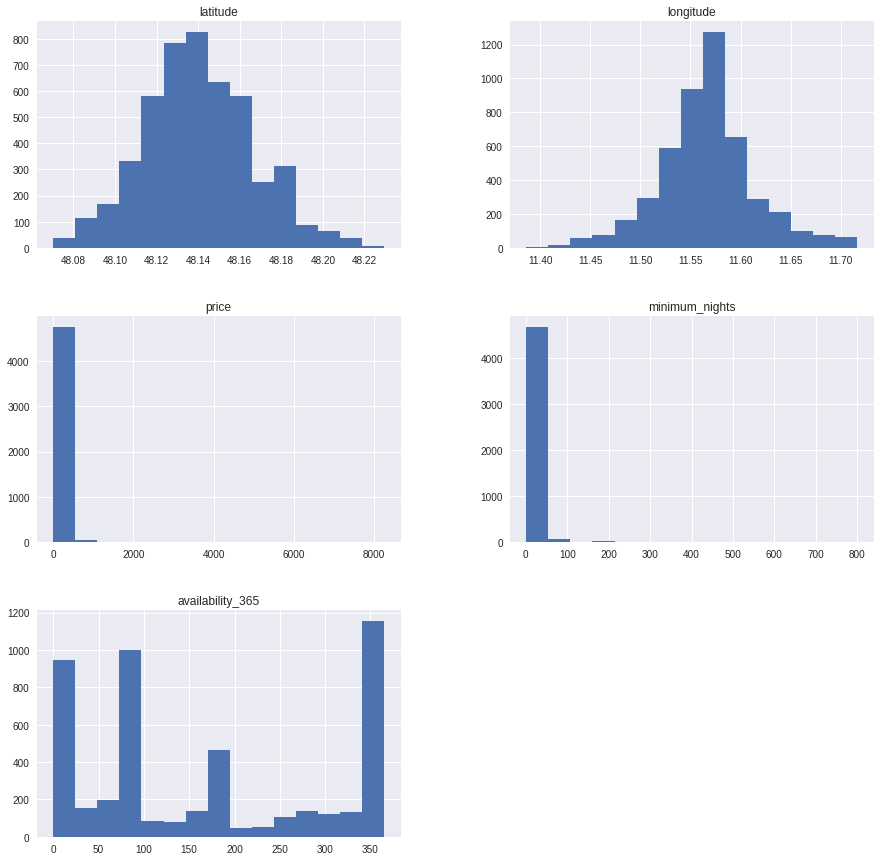

In [8]:
# variables histogram distribuition

df_raw.hist(bins = 15, figsize = (15,15));

Through the histogram, it is possible to verify the presence of outliers in the variables `price` and `minimum_nights`.

The values do not follow a distribution and distort the entire graphical representation. To confirm it, there are two quick ways to help detect outliers:

* Summary statistics using the `describe()` method;
* Plot `boxplots` for the variables.

In [9]:
# summary statistics

df_raw.describe()

,latitude,longitude,price,minimum_nights,availability_365
count,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000
mean,48.140364,11.566340,113.059398,7.581931,170.044444
std,0.026349,0.047674,246.613897,27.814543,136.200772
min,48.070270,11.386160,0.000000,1.000000,0.000000
25%,48.122785,11.540080,50.000000,1.000000,59.000000
50%,48.137760,11.566250,75.000000,2.000000,137.000000
75%,48.157890,11.589025,120.000000,3.000000,331.000000
max,48.229420,11.716460,8255.000000,800.000000,365.000000


Looking at the statistical summary above, it is possible to obtain valuable information for the analysis and about the presence of outliers.

* The variable `prices` has 75% of its values below 120, but its maximum value is 8255, which is well above the values obtained up to 75% of the dataset, which proves the presence of outliers.
* The variable `prices` presents minimum values equal to 0. Understanding the Airbnb business, it is known that no one rents any property on Airbnb for free.
* The variable `minimum_nights` has 75% of its values below 3, but its maximum value is 800, which is well above the values obtained up to 75% of the dataset, which proves the presence of outliers.

#### Boxplot for "prices"

Below, the boxplot for the variable `price` visually shows the information contained in the summary statistics.

As a parameter, all data greater than 1000 will be considered an outlier in this analysis. Below, you will see the quantity and ratio of these outliers and the values where `price` are equal to 0.

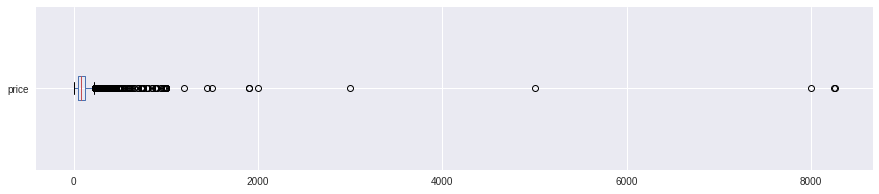

prices - values greater than 1000
Total:	11
Ratio:	0.23%


prices - values equal to 0
Total:	4
Ratio:	0.08%


In [10]:
# price

df_raw['price'].plot(kind = 'box', vert = False, figsize = (15,3))
plt.show()

# check the amount of values higher than 1000 and equal to 0 for prices

print('prices - values greater than 1000')
print(f'Total:\t{len(df_raw[df_raw.price > 1000])}')
print(f'Ratio:\t{(len(df_raw[df_raw.price > 1000]) / df_raw.shape[0]) * 100:.2f}%')
print('\n\nprices - values equal to 0')
print(f'Total:\t{len(df_raw[df_raw.price == 0])}')
print(f'Ratio:\t{(len(df_raw[df_raw.price == 0]) / df_raw.shape[0]) * 100:.2f}%')

#### Boxplot for "minimum_nights"

Below, the boxplot for the variable `minimum_nights` visually shows the information contained in the summary statistics.

As a parameter, all data greater than 30 will be considered an outlier in this analysis. Below, you will see the quantity and ratio of these outliers.

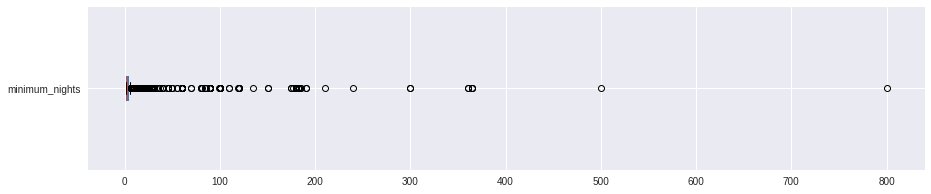

minimum_nights - values greater than 30
Total:	150
Ratio:	3.12%


In [11]:
# minimum_nights

df_raw['minimum_nights'].plot(kind = 'box', vert = False, figsize = (15,3))
plt.show()

# check the amount of values higher than 30 for minimum_nights

print('minimum_nights - values greater than 30')
print(f'Total:\t{len(df_raw[df_raw.minimum_nights > 30])}')
print(f'Ratio:\t{(len(df_raw[df_raw.minimum_nights > 30]) / df_raw.shape[0])*100:.2f}%')

#### Removing Outliers and Creating Data Frame for Analysis

Now with the outliers identified and treated, we shall plot new boxplots analyze them.

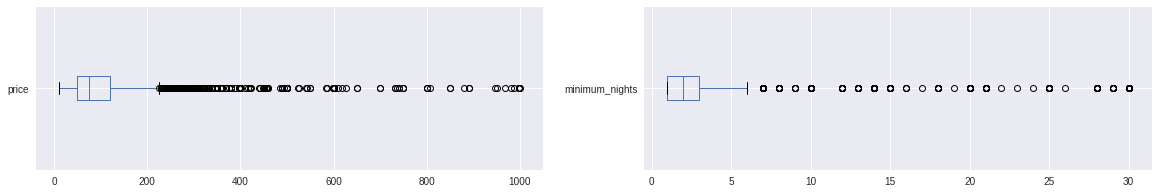

In [31]:
# removing outliers

df_raw.drop(df_raw[df_raw.price > 1000].index, axis = 0, inplace = True)
df_raw.drop(df_raw[df_raw.price == 0].index, axis = 0, inplace = True)
df_raw.drop(df_raw[df_raw.minimum_nights > 30].index, axis = 0, inplace = True)

# plot boxplots without outliers

plt.subplot(1,2,1)
df_raw['price'].plot(kind = 'box', vert = False, figsize = (20,3))
plt.subplot(1,2,2)
df_raw['minimum_nights'].plot(kind = 'box', vert = False, figsize = (20,3))
plt.show();

Finally, with the clean data frame created and treated, the analysis begins.

In [13]:
df = df_raw.copy()

df.describe()

,latitude,longitude,price,minimum_nights,availability_365
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,48.140480,11.566240,105.230538,3.775699,168.139570
std,0.026387,0.047949,102.880266,5.897144,136.001446
min,48.070270,11.386160,10.000000,1.000000,0.000000
25%,48.122973,11.540028,50.000000,1.000000,58.000000
50%,48.137890,11.566060,75.000000,2.000000,116.500000
75%,48.157920,11.589037,120.000000,3.000000,327.000000
max,48.229420,11.716460,1000.000000,30.000000,365.000000


## Data Analysis

This project aims to answer the following questions:

**Questions**

1. What is the proportion of the property types in Munich on Airbnb? And what is the proportion by neighbourhood?
2. What is the average property price in the different neighbourhoods of Munich?
3. How are property prices distributed in the 2 most expensive neighbourhoods?
4. How are property prices distributed in the 2 cheapest neighbourhoods?
5. Can tourist attractions represent high prices when choosing properties in Munich on Airbnb?

### Q1 - What is the proportion of the property types in Munich on Airbnb? And what is the proportion by neighbourhood?

It can be seen that the proportion of property types *'Entire home/apt'* and *'Private room'* in Munich is close, with **52.95%** and **44.09%** respectively.

In [14]:
df.room_type.value_counts()

Entire home/apt    2462
Private room       2050
Shared room          80
Hotel room           58
Name: room_type, dtype: int64

In [15]:
((df.room_type.value_counts() / df.shape[0]) * 100).apply('{:.2f}''%'.format)

Entire home/apt    52.95%
Private room       44.09%
Shared room         1.72%
Hotel room          1.25%
Name: room_type, dtype: object

As the property types *'Shared room'* and *'Hotel room'* are not relevant to the number of properties being rented on Airbnb in the city of Munich, I will continue this analysis in the neighbourhoods using only the property types *'Entire home/apt'* and *'Private room'*.

It can be seen that the distribution of property types in Munich is well balanced in most neighbourhoods.

In [21]:
entire_home_number = df.groupby('neighbourhood')['room_type'].apply(lambda x: \
                               (x == 'Entire home/apt').sum()).reset_index(name = 'Number Entire Home/Apt')
entire_home_ratio = df.groupby('neighbourhood')['room_type'].apply(lambda x: \
                              (x == 'Entire home/apt').sum() / ((x == 'Private room').sum() + ( x== 'Entire home/apt').sum()) * 100) \
                               .apply('{:.2f}''%'.format).reset_index(name = 'Ratio Entire Home/Apt')

private_room_number = df.groupby('neighbourhood')['room_type'].apply(lambda x: \
                               (x == 'Private room').sum()).reset_index(name = 'Number Private Room')
private_room_ratio = df.groupby('neighbourhood')['room_type'].apply(lambda x: \
                              (x == 'Private room').sum() / ((x == 'Private room').sum() + ( x== 'Entire home/apt').sum()) * 100) \
                               .apply('{:.2f}''%'.format).reset_index(name = 'Ratio Private Room')

merge_dfs = [entire_home_number, entire_home_ratio, private_room_number, private_room_ratio]

neighbourhood = reduce(lambda left_df, right_df: pd.merge(left_df, right_df, on = ['neighbourhood'], \
                                                         how = 'outer'), merge_dfs).sort_values(by = 'Ratio Entire Home/Apt', ascending = False) \
                                                         .reset_index(drop = True)

neighbourhood

,neighbourhood,Number Entire Home/Apt,Ratio Entire Home/Apt,Number Private Room,Ratio Private Room
0,Maxvorstadt,241,64.61%,132,35.39%
1,Altstadt-Lehel,99,62.66%,59,37.34%
2,Schwabing-West,188,58.93%,131,41.07%
3,Untergiesing-Harlaching,69,58.47%,49,41.53%
4,Ludwigsvorstadt-Isarvorstadt,286,57.89%,208,42.11%
5,Bogenhausen,134,57.26%,100,42.74%
6,Au-Haidhausen,148,57.14%,111,42.86%
7,Ramersdorf-Perlach,106,56.08%,83,43.92%
8,Neuhausen-Nymphenburg,143,55.64%,114,44.36%
9,Moosach,56,54.90%,46,45.10%


Below you can see the neighbourhoods where the proportion of property type *'Entire home/apt'* is higher, so if the Airbnb user wants to stay in one of the neighbourhoods listed below, there is a greater chance that this user will find offers of this type property available.

In [22]:
neighbourhood.iloc[0:5]

,neighbourhood,Number Entire Home/Apt,Ratio Entire Home/Apt,Number Private Room,Ratio Private Room
0,Maxvorstadt,241,64.61%,132,35.39%
1,Altstadt-Lehel,99,62.66%,59,37.34%
2,Schwabing-West,188,58.93%,131,41.07%
3,Untergiesing-Harlaching,69,58.47%,49,41.53%
4,Ludwigsvorstadt-Isarvorstadt,286,57.89%,208,42.11%


Now, you can see the neighbourhoods where the proportion of property type *'Private room'* is higher, so if the Airbnb user wants to stay in one of the neighbourhoods listed below, there is a greater chance that this user will find offers for this type of property available.

In [23]:
neighbourhood.iloc[-5:]

,neighbourhood,Number Entire Home/Apt,Ratio Entire Home/Apt,Number Private Room,Ratio Private Room
20,Laim,66,45.83%,78,54.17%
21,Hadern,23,43.40%,30,56.60%
22,Allach-Untermenzing,16,43.24%,21,56.76%
23,Pasing-Obermenzing,50,43.10%,66,56.90%
24,Aubing-Lochhausen-Langwied,17,39.53%,26,60.47%


### Q2 -  What is the average property price in the different neighbourhoods of Munich?


It has already been seen in the summary statistics that the average property price in Munich is **€ 105.23**. Below is the average property price per neighbourhood in Munich. We can see that there is a big price difference, where the average price in the **most expensive neighbourhood is € 149.36 and in the cheapest neighbourhood is 74.94**.

In [24]:
mean_region = pd.DataFrame(df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).reset_index())

mean_region

,neighbourhood,price
0,Ludwigsvorstadt-Isarvorstadt,149.364341
1,Altstadt-Lehel,146.521739
2,Schwanthalerhöhe,128.727273
3,Sendling,118.685535
4,Feldmoching-Hasenbergl,111.109375
5,Maxvorstadt,107.625330
6,Tudering-Riem,104.181818
7,Au-Haidhausen,103.609489
8,Sendling-Westpark,100.971264
9,Schwabing-West,99.962500


To continue this analysis, I will extract the 2 most expensive and cheapest neighbourhoods in Munich concerning the average price of all properties.

In [25]:
mean_region.iloc[[0,1,-2,-1]]

,neighbourhood,price
0,Ludwigsvorstadt-Isarvorstadt,149.364341
1,Altstadt-Lehel,146.521739
23,Milbertshofen-Am Hart,78.583815
24,Moosach,74.944444


### Q3 - How are property prices distributed in the 2 most expensive neighbourhoods?

When analyzing the price per property type in the two most expensive neighbourhoods of Munich concerning the average price, we shall observe that:

**Ludwigsvorstadt-Isarvorstadt**

1. ***'Entire room/apt'***
    * The average price is far from the median (159.98 x 110.00 respectively), which indicates the presence of outliers.
    * It is possible to rent a property of this type in this neighbourhood for **€ 30.00**.
    
    
2. ***'Private room'***
    * The average price is far from the median (131.86 x 76.50 respectively), which indicates the presence of outliers.
    * It is possible to rent a property of this type in this neighbourhood for **€ 25.00**.

---
    
**Altstadt-Lehel**

1. ***'Entire room/apt'***
    * The average price is far from the median (173.19 x 145.00 respectively), which indicates the presence of outliers.
    * It is possible to rent a property of this type in this neighbourhood for **€ 10.00**.
    
    
2. ***'Private room'***
    * The average price is far from the median (104.91 x 80.00 respectively), which indicates the presence of outliers.
    * It is possible to rent a property of this type in this neighbourhood for **€ 35.00**.

In [26]:
neighbourhood_analysis = [df['neighbourhood'].unique()[10], df['neighbourhood'].unique()[20]]

room_analysis = [df['room_type'].unique()[0], df['room_type'].unique()[1]]

dict_neighbourhood_analysis = {'count':[],
                               'mean':[],
                               'median':[],
                               'min':[],
                               'max':[],
                               'range':[]}


count = []
average = []
median = []
minimum = []
maximum = []
difference = []
    
for neighbourhood in neighbourhood_analysis:

   
    for room in room_analysis:
       
        for i in list([0, 1, 3, 5, 7]):
           
            if i == 0:
                value_count = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                count.append(value_count)
            elif i == 1:
                value_average = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                average.append(value_average)
            elif i == 3:
                value_minimum = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                minimum.append(value_minimum)
            elif i == 5:
                value_median = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                median.append(value_median)
            else:
                value_maximum = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                maximum.append(value_maximum)
                
                value_difference = value_maximum - value_minimum
                difference.append(value_difference)
        
        
        dict_neighbourhood_analysis['count'] = count
        dict_neighbourhood_analysis['mean'] = average
        dict_neighbourhood_analysis['median'] = median        
        dict_neighbourhood_analysis['min'] = minimum
        dict_neighbourhood_analysis['max'] = maximum
        dict_neighbourhood_analysis['range'] = difference
            
            

header = [
            [
                df['neighbourhood'].unique()[10], df['neighbourhood'].unique()[10],
                df['neighbourhood'].unique()[20], df['neighbourhood'].unique()[20]
            ],
            [
                df['room_type'].unique()[0], df['room_type'].unique()[1],
                df['room_type'].unique()[0], df['room_type'].unique()[1] 
            ]
         ]

df_neighbourhood_analysis = pd.DataFrame(dict_neighbourhood_analysis.values(), index = dict_neighbourhood_analysis.keys(), columns = header)

df_neighbourhood_analysis
               
    

Ludwigsvorstadt-Isarvorstadt               Altstadt-Lehel             
                    Entire home/apt Private room Entire home/apt Private room
count                    286.000000   208.000000       99.000000    59.000000
mean                     159.982517   131.860577      173.191919   104.915254
median                   110.000000    77.500000      145.000000    80.000000
min                       30.000000    25.000000       10.000000    35.000000
max                      988.000000   947.000000      999.000000   359.000000
range                    958.000000   922.000000      989.000000   324.000000

In order to have a better view of prices and confirmation of the presence of outliers, we will plot the boxplot again for properties in these neighbourhoods.

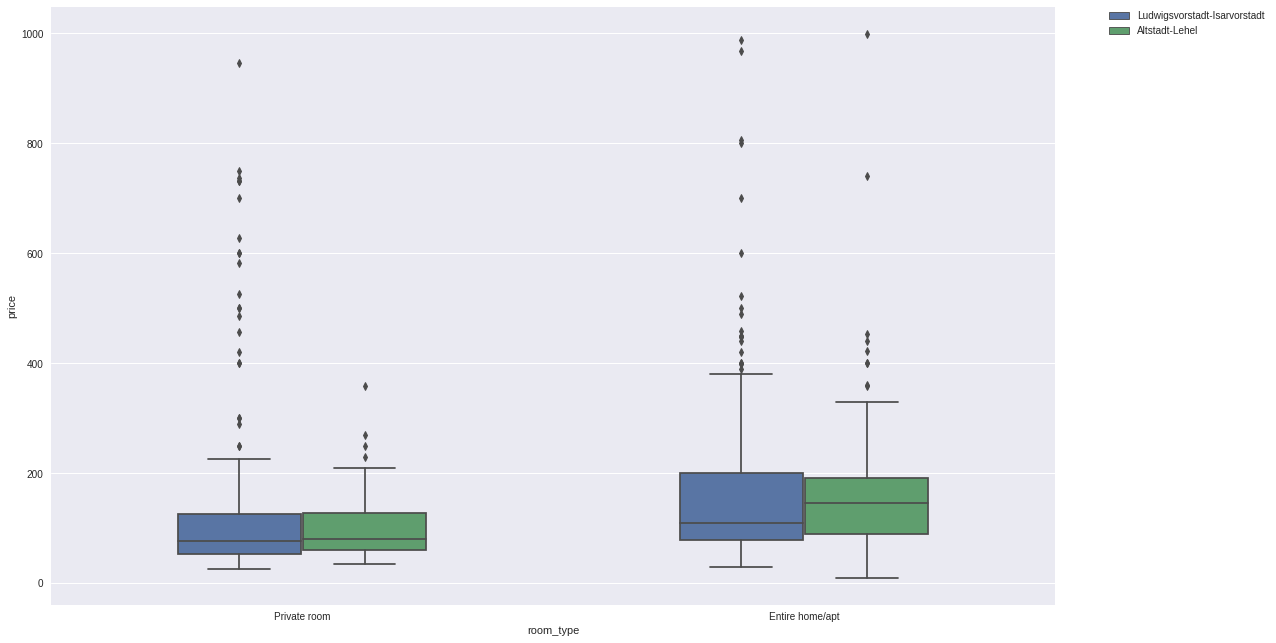

In [27]:
ludwig_neigh = df[(df['room_type'] != 'Shared room') & (df['room_type'] != 'Hotel room') \
                & (df['neighbourhood'] == 'Ludwigsvorstadt-Isarvorstadt')]

altstadt_neigh = df[(df['room_type'] != 'Shared room') & (df['room_type'] != 'Hotel room') \
                & (df['neighbourhood'] == 'Altstadt-Lehel')]

exp_neigh = pd.concat([ludwig_neigh, altstadt_neigh]).reset_index(drop = True)

exp_neigh

sns.boxplot(x = 'room_type', y = 'price' , data = exp_neigh, hue = 'neighbourhood', width = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Through the boxplot chart, the presence of outliers in the price of different property types in these neighbourhoods is clear. For this reason, it is better to consider the median price, as the median is not as sensitive to outlier values as the average.

With that, we can conclude that:

* The price of both property types is **higher in Altstadt-Lehel** than in Ludwigsvorstadt-Isarvorstadt when we start to consider the median as the base price.

* Although Altstadt-Lehel is the most expensive location based on the median price for the *'Entire home/apt'* property type, it is possible to find this type of property for the lowest minimum price, **€ 10.00**.

* It is possible to find *'Private room'* properties at minimum price lower **in Ludwigsvorstadt-Isarvorstadt** than in Altstadt-Lehel.

### Q4 - How are property prices distributed in the 2 cheapest neighbourhoods?

When analyzing the price per property type in the two most expensive neighbourhoods of Munich concerning the average price, we shall observe that:

**Moosach**

1. ***'Entire room/apt'***

    * The average price is far from the median (88.69 x 62.50 respectively), which indicates the presence of outliers.
    
    * It is possible to rent a property of this type in this neighbourhood for **€ 33.00**.


2. ***'Private room'***
    * The average price is far from the median (60.19 x 59.50 respectively), which indicates the presence of outliers.
    
    * It is possible to rent a property of this type in this neighbourhood for **€ 20.00**.


---
    
**Milbertshofen-Am Hart**

1. ***'Entire room/apt'***
    * The average price is far from the median (93.89 x 69.00 respectively), which indicates the presence of outliers.
    
    * It is possible to rent a property of this type in this neighbourhood for **€ 16.00**.
    
    
2. ***'Private room'***
    * The average price is far from the median (61.19 x 50.00 respectively), which indicates the presence of outliers.
    
    * It is possible to rent a property of this type in this neighbourhood for **€ 23.00**.

In [32]:
neighbourhood_analysis2 = [df['neighbourhood'].unique()[17], df['neighbourhood'].unique()[24]]

room_analysis = [df['room_type'].unique()[0], df['room_type'].unique()[1]]

dict_neighbourhood_analysis2 = {'count':[],
                               'mean':[],
                               'median':[],
                               'min':[],
                               'max':[],
                               'range':[]}


count2 = []
average2 = []
median2 = []
minimum2 = []
maximum2 = []
difference2 = []
    
for neighbourhood in neighbourhood_analysis2:

   
    for room in room_analysis:
       
        for i in list([0, 1, 3, 5, 7]):
           
            if i == 0:
                value_count = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                count2.append(value_count)
            elif i == 1:
                value_average = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                average2.append(value_average)
            elif i == 3:
                value_minimum = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                minimum2.append(value_minimum)
            elif i == 5:
                value_median = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                median2.append(value_median)
            else:
                value_maximum = df['price'].loc[(df['neighbourhood'] == neighbourhood) & (df['room_type'] == room)].describe()[i]
                maximum2.append(value_maximum)
                
                value_difference = value_maximum - value_minimum
                difference2.append(value_difference)
        
        dict_neighbourhood_analysis2['count'] = count2
        dict_neighbourhood_analysis2['mean'] = average2
        dict_neighbourhood_analysis2['median'] = median2
        dict_neighbourhood_analysis2['min'] = minimum2
        dict_neighbourhood_analysis2['max'] = maximum2
        dict_neighbourhood_analysis2['range'] = difference2
            
            

header2 = [
            [
                df['neighbourhood'].unique()[17], df['neighbourhood'].unique()[17],
                df['neighbourhood'].unique()[24], df['neighbourhood'].unique()[24]
            ],
            [
                df['room_type'].unique()[0], df['room_type'].unique()[1],
                df['room_type'].unique()[0], df['room_type'].unique()[1] 
            ]
         ]


df_neighbourhood_analysis2 = pd.DataFrame(dict_neighbourhood_analysis2.values(), index = dict_neighbourhood_analysis2.keys(), columns = header2)

df_neighbourhood_analysis2   

Milbertshofen-Am Hart                      Moosach             
             Entire home/apt Private room Entire home/apt Private room
count              87.000000    73.000000       56.000000    46.000000
mean               93.896552    61.191781       88.696429    60.195652
median             69.000000    50.000000       62.500000    59.500000
min                16.000000    23.000000       33.000000    20.000000
max               500.000000   280.000000      499.000000   180.000000
range             484.000000   257.000000      466.000000   160.000000

In order to have a better view of prices and confirmation of the presence of outliers, we will plot the boxplot again for properties in these neighbourhoods.

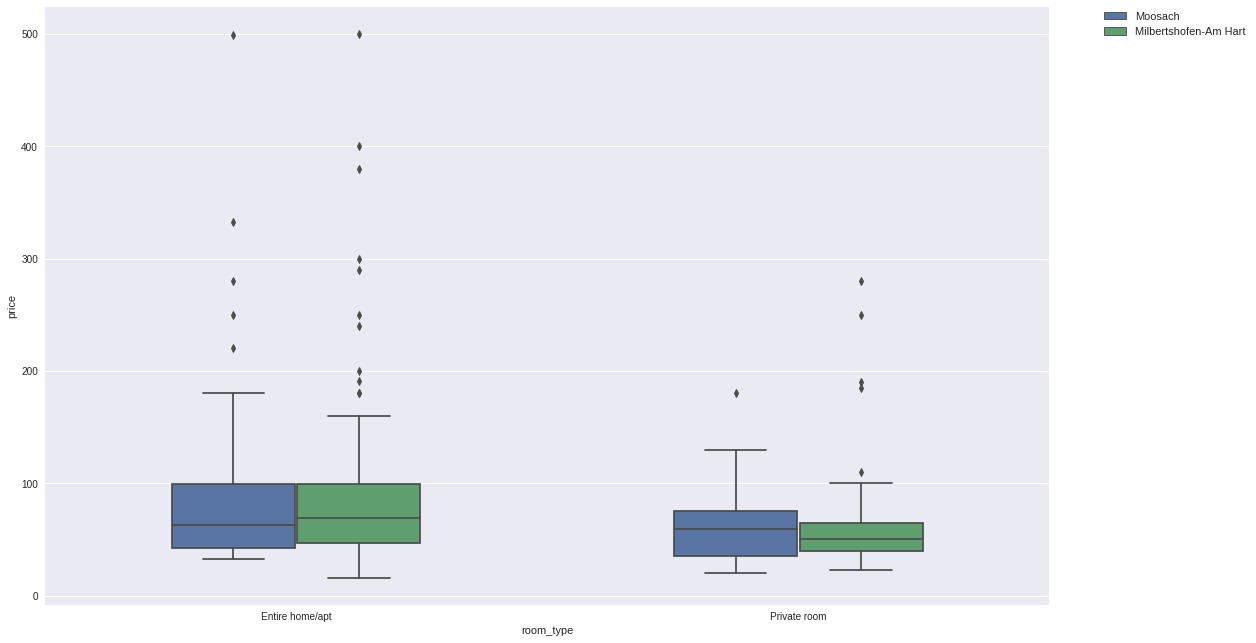

In [33]:
milbertshofen_neigh = df[(df['room_type'] != 'Shared room') & (df['room_type'] != 'Hotel room') \
                & (df['neighbourhood'] == 'Milbertshofen-Am Hart')]

moosach_neigh = df[(df['room_type'] != 'Shared room') & (df['room_type'] != 'Hotel room') \
                & (df['neighbourhood'] == 'Moosach')]

che_neigh = pd.concat([moosach_neigh, milbertshofen_neigh]).reset_index(drop = True)

che_neigh

sns.boxplot(x = 'room_type', y = 'price' , data = che_neigh, hue = 'neighbourhood', width = 0.5)
sns.set_context("poster", font_scale = .5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Through the boxplot chart, the presence of outliers in the price of different property types in these neighbourhoods is clear. For this reason, it is better to consider the median price, as the median is not as sensitive to outlier values as the average.

With that, we can conclude that:

* The price for *'Entire home/apt'* is **lower in Moosach** than in Milbertshofen-Am Hart.

* Although Moosach is the cheapest location based on the median price for the *'Entire home/apt'* property type, it is possible to find this type of property for the lowest minimum price of **€ 16.00 in Milbertshofen-Am Hart**.

* The price of  property type *'Private room'* is **lower in Milbertshofen-Am Hart** than in Moosach.

* It is possible to find *'Private room'* properties at a minimum price lower **in Moosach** than in Milbertshofen-Am Hart.

### Q5 - Can tourist spots represent high prices when choosing properties in Munich on Airbnb?

We know that in most urban centers, the central regions usually have the largest number of sights, places for nightlife, restaurants, offices, and more. Consequently, this increases the demand for people looking for apartments and rooms in these areas, making prices in these areas commonly higher than in other regions.

A final analysis will be conducted to identify tourist spots in Munich, and then confirm whether the location of these tourist spots is closer to the most expensive or cheapest neighbourhoods in the city.

For this, the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website has another dataset on which we can make this analysis.

This data frame has already been generated in the **'Obtaining the Data'* part of this notebook.

In [28]:
# null data
munich_neighbourhoods_airbnb_df = munich_neighbourhoods_airbnb_df[~ munich_neighbourhoods_airbnb_df['neighbourhood'].isnull()]

munich_neighbourhoods_airbnb_df.head()

# expensive and cheap neighbourhoods

munich_neighbourhoods_airbnb_df.loc[(
                munich_neighbourhoods_airbnb_df['neighbourhood'] != 'Ludwigsvorstadt-Isarvorstadt') & ( \
                munich_neighbourhoods_airbnb_df['neighbourhood'] != 'Altstadt-Lehel') & ( \
                munich_neighbourhoods_airbnb_df['neighbourhood'] != 'Milbertshofen-Am Hart') & ( \
                munich_neighbourhoods_airbnb_df['neighbourhood'] != 'Moosach'), 'neighbourhood'] = 'None'

munich_neighbourhoods_airbnb_df['neighbourhood'].unique()


array(['Altstadt-Lehel', 'Ludwigsvorstadt-Isarvorstadt', 'None',
       'Moosach', 'Milbertshofen-Am Hart'], dtype=object)

With the `Nominatim`, we can create a locator using the name of these tourist spots and get their latitudes and longitudes. These tourist spots were selected on the [official website of Munich](https://www.muenchen.de/sehenswuerdigkeiten/top-20-sehenswuerdigkeiten.html). 

After generating a dictionary of tourist spots in Munich, we can start plotting our map of Munich, with the chosen neighbourhoods and tourist spots.

In [29]:
# function to get latitude and longitude

def latitude_longitude_locator(x):
    
    locator = Nominatim(user_agent = 'myGeocoder')

    location = locator.geocode(x)
    
    if location is None:
        None
    else:
        return location.longitude, location.latitude

# list of touristic locations

munchen_locations = [
                     'Frauenkirche München', 
                     'Schloss Nymphenburg', 
                     'Marienplatz', 
                     'Alter Peter',
                     'Allianz Arena',
                     'Karlsplatz (Stachus)',
                     'Odeonsplatz', 
                     'Residenz',
                     'Deutsches Museum', 
                     'Olympiapark',
                     'BMW Welt',
                     'Alte Pinakothek',
                     'Neue Pinakothek',
                     'Pinakothek der Moderne',
                     'Tierpark Hellabrunn',
                     'Bayerische Staatsoper',
                     'Hofbräuhaus',
                     'Alter Hof',
                     'Viktualienmarkt',
                    ]

# get the geo data
munchen_locations_geo = {
                         x: latitude_longitude_locator(x) 
                         for x in munchen_locations 
                        }

# remove none data
munchen_locations_geo = {
                         k: v 
                         for k, v in munchen_locations_geo.items()
                         if v is not None
                        }

munchen_locations_geo

{'Frauenkirche München': (11.573592008043118, 48.1385821),
 'Schloss Nymphenburg': (11.5032967, 48.1582569),
 'Marienplatz': (11.575924590567384, 48.137031750000006),
 'Alter Peter': (11.576030455223243, 48.13644495),
 'Allianz Arena': (11.624664151799873, 48.21880845),
 'Karlsplatz (Stachus)': (11.565622, 48.1394857),
 'Odeonsplatz': (11.5763171, 48.1427658),
 'Residenz': (11.57904463904056, 48.1411608),
 'Deutsches Museum': (11.582908990594504, 48.1300409),
 'Olympiapark': (11.55032660696114, 48.16875265),
 'BMW Welt': (11.556375779693298, 48.1772189),
 'Alte Pinakothek': (11.569970907138872, 48.1482861),
 'Neue Pinakothek': (11.570937445883057, 48.1499278),
 'Pinakothek der Moderne': (11.572227101401982, 48.14716025),
 'Tierpark Hellabrunn': (11.554196865190177, 48.096281149999996),
 'Bayerische Staatsoper': (11.579513288504806, 48.1396162),
 'Hofbräuhaus': (11.57998140312025, 48.13757095),
 'Alter Hof': (11.5780147, 48.1382036),
 'Viktualienmarkt': (11.576255684942478, 48.135575200

On the map, we can confirm that most of the tourist spots in Munich are located in the most expensive neighbourhoods of the city.

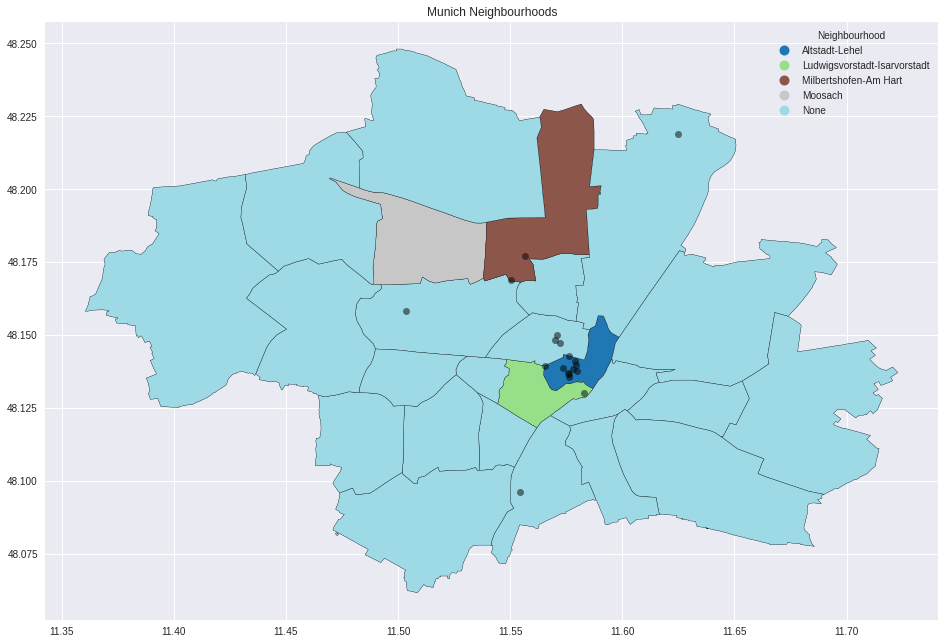

In [30]:
fig, ax = plt.subplots()

munich_neighbourhoods_airbnb_df.plot(
                                     ax = ax, 
                                     alpha = 0.8
                                    )

munich_neighbourhoods_airbnb_df.plot(
                                     ax = ax, 
                                     column = 'neighbourhood',
                                     categorical = True, 
                                     legend = True, 
                                     legend_kwds = {'title': 'Neighbourhood', 'loc': 'upper right'},
                                     cmap = 'tab20', 
                                     edgecolor = 'black',
                                    )

for c in munchen_locations_geo.keys():

#   ax.text(
#           x = munchen_locations_geo[c][0], 
#           y = munchen_locations_geo[c][1] + 0.005, 
#           s = c, 
#           fontsize = 3,
#           ha = 'center' 
#          )

    ax.plot(
            munchen_locations_geo[c][0], 
            munchen_locations_geo[c][1], 
            marker = 'o',
            c = 'black', 
            alpha = 0.5
           )

ax.set(
       title = 'Munich Neighbourhoods', 
       aspect = 1.3
      );

## Conclusion

Even working with a non-complete dataset, it was possible to see many outliers in the price variable, which was the fundamental variable used for this analysis. Treatment of outliers was carried out at the beginning of the project, using the entire city as a parameter. However, when the analysis of the most expensive and cheapest neighbourhoods concerning the average price began, it was possible to observe the existence of outliers in neighbourhood prices, which means that the analysis with the average price can be a non-viable alternative for a better representation of reality.

The analysis of the Airbnb in Munich showed us that the property types 'Entire room/apt' and 'Private room' are well balanced, probably it is a result of the policies applied regarding the restriction of the period of days for renting entire properties in the city.

For future iterations in this project, I will use the complete dataset available on [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website. This dataset offers a possibility of analyzing important variables that can explain the price, such as square meter, amenities among others.

Questions, suggestions for improvements, and corrections are welcome, and thank you for analyzing the data with me so far!